In [30]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
res = os.system('make all')
res

g++ -pthread -o producer_consumer.o producer_consumer.cpp


0

In [ ]:
N = [1, 2, 4, 16, 32]
producers_consumers = [
    (1, 1),(1, 2),(1, 4),(1, 8),(2, 1),(4, 1),(8, 1)]

qt_samples = 10

list_means = []
list_n = []
list_np_nc = []

for i in range(len(N)):

    for j in range(len(producers_consumers)):
        n = N[i]
        list_n.append(n)
        Np = producers_consumers[j][0]
        Nc = producers_consumers[j][1]
        list_np_nc.append((Np, Nc))
        sum_value = 0
        
    
    
        for k in range(qt_samples):
            command = ['./producer_consumer.o', str(n), str(Np), str(Nc)]
            res = subprocess.run(command, capture_output=True)
            sum_value += int(res.stdout)
        list_means.append(sum_value/number)
    
        
df_means = pd.DataFrame({'N': list_n, 'Time (ms)': list_means, '(Np, Nc)': list_np_nc})

df_means.to_csv('results.csv')

df_means

In [23]:
data_csv = pd.read_csv('results.csv')
data_csv

,Unnamed: 0,N,Time (ms),"(Np, Nc)"
0,0,1,15.3,"(1, 1)"
1,1,1,18.4,"(1, 2)"
2,2,1,125.8,"(1, 4)"
3,3,1,221.1,"(1, 8)"
4,4,1,215.6,"(2, 1)"
5,5,1,222.1,"(4, 1)"
6,6,1,240.0,"(8, 1)"
7,7,2,13.4,"(1, 1)"
8,8,2,13.4,"(1, 2)"
9,9,2,36.4,"(1, 4)"


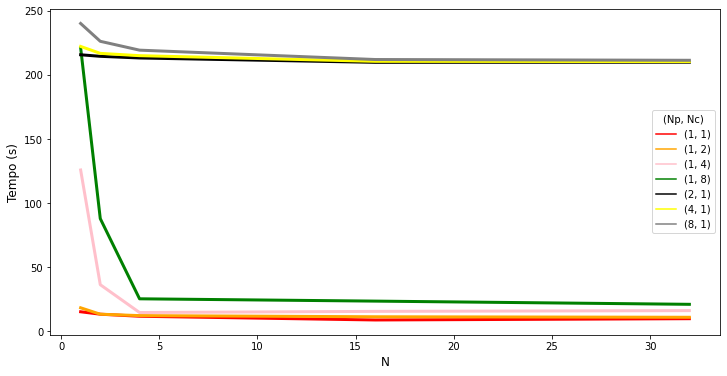

In [25]:
fig = plt.figure(figsize=(12,6))
plt.xlabel('N', fontsize=12)
plt.ylabel('Tempo (s)', fontsize=12)
sns.lineplot(
  data = df_means,
  x = "N",
  y = "Time (ms)",
  hue = "(Np, Nc)",
  linewidth = 3,
  palette = ["red", "orange", "pink", "green", "black", "yellow", "gray"]
)
plt.savefig('plot.png')
plt.show()